In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# y = w * x

X = torch.tensor(((1, 10),
                  (1, 20),
                  (1, 30),
                  (1, 40)), dtype=torch.float32)

w = torch.ones(2, requires_grad=True, dtype=torch.float32)
Y = torch.tensor((110, 210, 310, 410), dtype=torch.float32)

w_list = []

n_steps = 100
lr = 0.001

loss_fun = torch.nn.MSELoss()

optimizer = torch.optim.SGD([w], lr=lr)

for i in range(n_steps):
    Y_pred = X @ w
    loss = loss_fun(Y, Y_pred)
    
    loss.backward(retain_graph=True)
    optimizer.step()
    optimizer.zero_grad()
    with torch.no_grad():
        w_list.append(np.array(w))
print(w)

tensor([ 1.5944, 10.2802], requires_grad=True)


In [18]:
loss_list = []
for w_hat in w_list:
    loss_list.append(loss_fun(X @ w_hat, Y))
loss_list = list(torch.tensor(loss_list))

print(w_list)

[array([ 1.468   , 14.950001], dtype=float32), array([1.237564 , 7.9515996], dtype=float32), array([ 1.3575089, 11.462322 ], dtype=float32), array([1.3016777, 9.700963 ], dtype=float32), array([ 1.3340262, 10.5844345], dtype=float32), array([ 1.3221364, 10.141082 ], dtype=float32), array([ 1.332438, 10.363352], dtype=float32), array([ 1.3316056, 10.251702 ], dtype=float32), array([ 1.3363572, 10.3075695], dtype=float32), array([ 1.3383061, 10.279397 ], dtype=float32), array([ 1.3416597, 10.293386 ], dtype=float32), array([ 1.3443071, 10.286223 ], dtype=float32), array([ 1.3473073, 10.289673 ], dtype=float32), array([ 1.350129, 10.287798], dtype=float32), array([ 1.3530388, 10.288594 ], dtype=float32), array([ 1.355903, 10.288051], dtype=float32), array([ 1.3587887, 10.288179 ], dtype=float32), array([ 1.3616621, 10.287971 ], dtype=float32), array([ 1.3645403, 10.287931 ], dtype=float32), array([ 1.3674147, 10.287807 ], dtype=float32), array([ 1.3702896, 10.287725 ], dtype=float32), arr

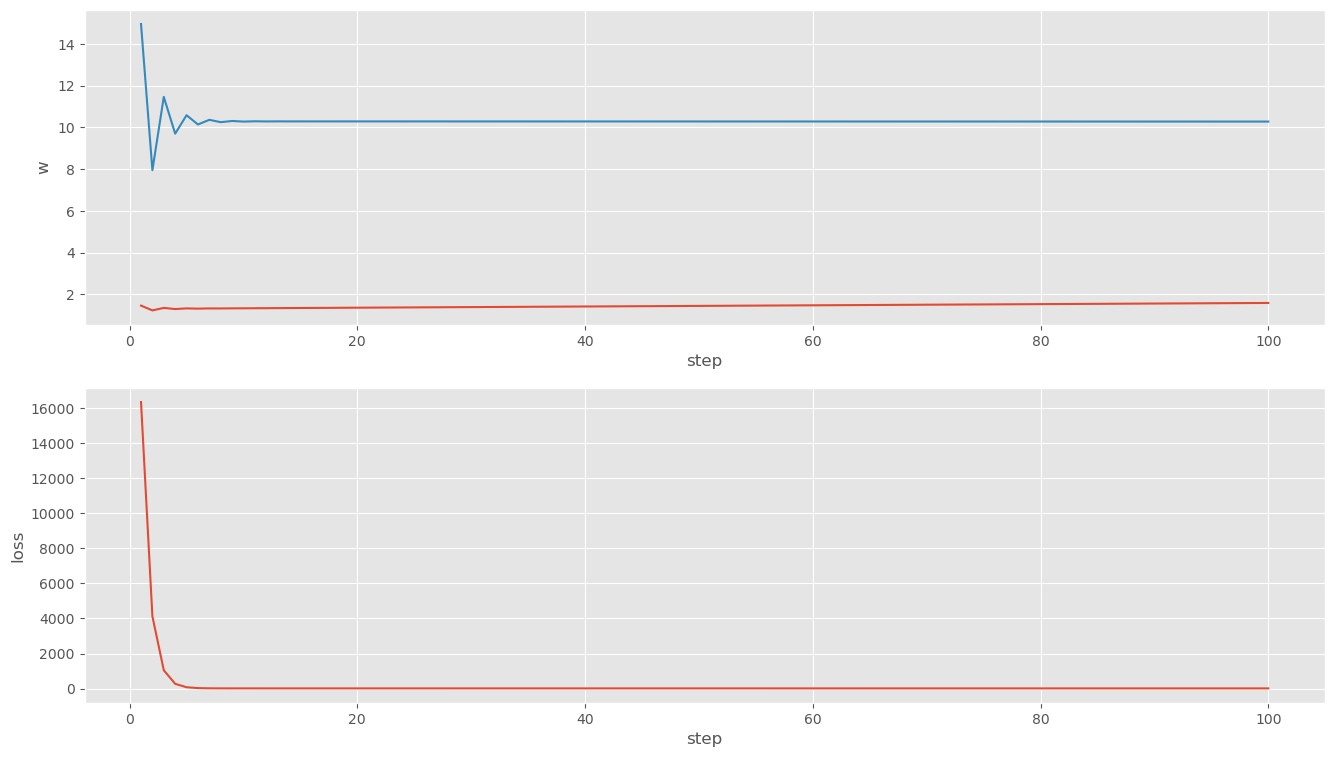

In [19]:
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))

ax1.plot(range(1, n_steps + 1), np.array(w_list))
ax1.set_ylabel('w')
ax1.set_xlabel('step')

ax2.plot(range(1, n_steps + 1), loss_list)
ax2.set_ylabel('loss')
ax2.set_xlabel('step')

plt.show()

In [20]:
X @ w

tensor([104.3969, 207.1994, 310.0019, 412.8044], grad_fn=<MvBackward0>)

In [47]:
def loss_fun(w: float) -> float:
    x = np.array((10, 20, 30, 40), dtype=float)
    y = np.array((100, 200, 300, 400), dtype=float)
    return 0.25 * ((w * x - y)**2).sum()

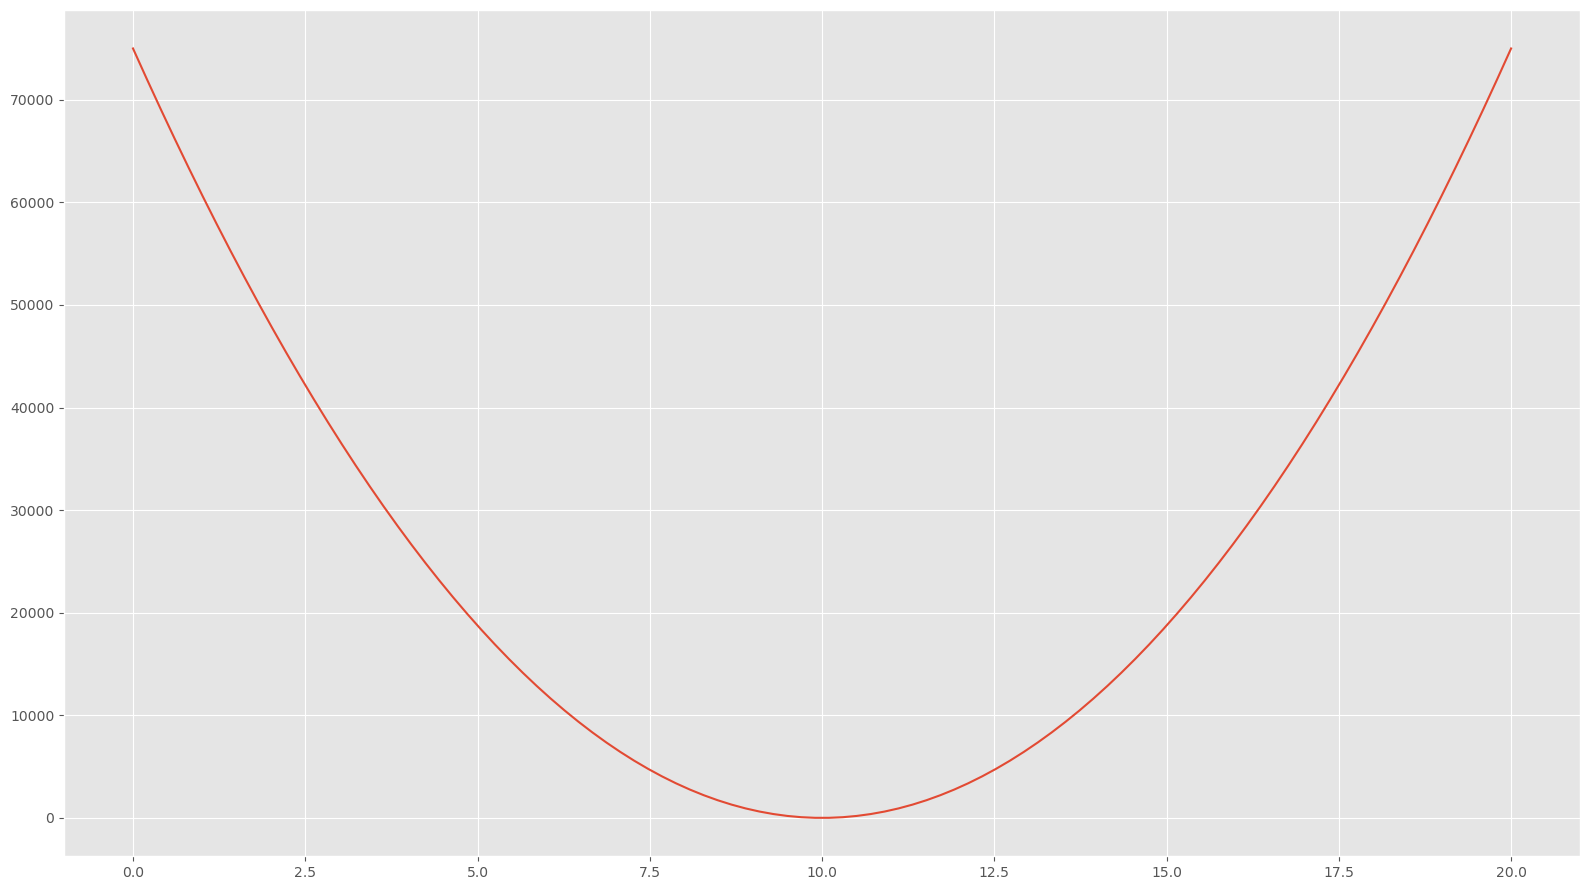

In [49]:
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
w = np.linspace(0, 20, 100)
l = [loss_fun(i) for i in w]
ax.plot(w, l)
plt.show()

In [51]:
def update_w(w_k: float, alpha: float)-> float:
    x = np.array((10, 20, 30, 40), dtype=float)
    y = np.array((100, 200, 300, 400), dtype=float)
    return w_k - 2 * alpha * x @ (w_k * x - y)

In [62]:
update_w(11, 0.0001)

10.4

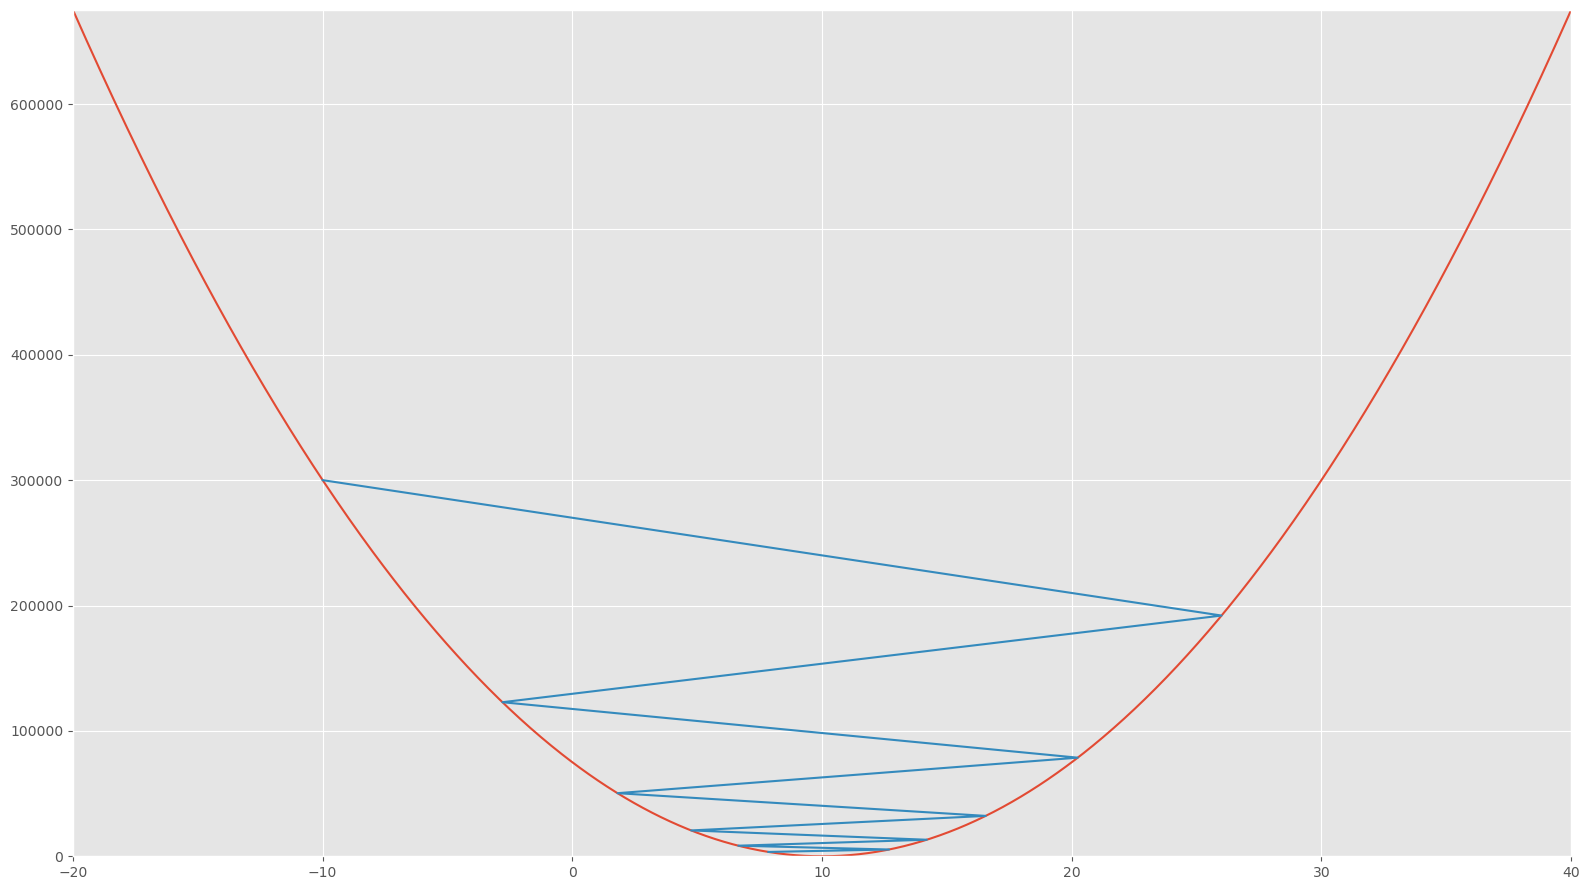

In [81]:
fig, ax = plt.subplots(figsize=(16, 9), tight_layout=True)
w = np.linspace(-20, 40, 1000)
l = [loss_fun(i) for i in w]
ax.plot(w, l)

w_0 = -10
lr = 0.0003
w_list = [w_0]
n_steps = 10

for _ in range(n_steps):
    w_list.append(update_w(w_list[-1], lr))

ax.plot(w_list, [loss_fun(i) for i in w_list])
ax.set_xlim((-20, 40))
ax.set_ylim((0, loss_fun(-20)))
plt.show()